In [263]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.constants import mu_0
from matplotlib import cm
import math
dt = 1e-3
k = 8.988e9


In [264]:
class Vector:
    def __init__(self,x,y,z):
        self.z = z
        self.y = y
        self.x = x

    def __str__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"
    
    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"


    def __add__(self, other):
        if not isinstance(other,Vector):
            raise ValueError("The 'other' object must be a Vector")
        test = Vector(0,0,0)
        test.x = self.x + other.x
        test.y = self.y + other.y
        test.z = self.z + other.z
        return test

    def __sub__(self, other):
        if not isinstance(other,Vector):
            raise ValueError("The 'other' object must be a Vector")
        result_x = self.x - other.x
        result_y = self.y - other.y
        result_z = self.z - other.z
        return Vector(result_x, result_y, result_z)
    
    def __mul__(self,other):
        return Vector(self.x * other, self.y * other, self.z* other)
    
    def __truediv__ (self,other):
        temp = Vector(0,0,0)
        temp.x = self.x/other
        temp.y = self.y/other
        temp.z = self.z/other
        return temp

    def dot_product(self, other):
        if not isinstance (other, Vector):
            raise ValueError("The 'other' object must be a Vector")
        test = Vector(0,0,0)
        test.x = self.x * other.x
        test.y = self.y * other.y
        test.z = self.z * other.z
        result = test.x + test.y + test.z
        return result
    

    #just check once if the cross product is good or not for lorentz force B_force
    def cross_product(a,b):
        temp = Vector(0, 0, 0)
        temp.x = a.y * b.z - a.z * b.y
        temp.y = a.z * b.x - a.x * b.z
        temp.z = a.x * b.y - a.y * b.x
        return temp
    
    def mod(self):
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    def dist(self,other):
        return math.sqrt((self.x-other.x)**2 + (self.y-other.y)**2 + (self.z-other.z)**2)

In [265]:
class Particle:
    def __init__ (self,mass,charge,mcharge,pos,vel):
        self.mass = mass
        self.charge = charge
        self.mcharge = mcharge
        self.pos = pos
        self.vel = vel
        self.trajectory_x = []
        self.trajectory_y = []
        self.trajectory_z = []
        self.trajectory_x.append(self.pos.x)
        self.trajectory_y.append(self.pos.y)
        self.trajectory_z.append(self.pos.z)
    
    def __str__ (self):
        return f"Particle \n Mass: {self.mass} \n Charge : {self.charge}\n mCharge : {self.mcharge}\n Position {self.pos}\n Velocity {self.vel}"

    def __repr__ (self):
        return f"Particle \n Mass: {self.mass} \n Charge : {self.charge} \n mCharge : {self.mcharge} \n Position {self.pos}\n Velocity {self.vel}"
    
    def update(self,tot_acc):
        self.vel += tot_acc*dt
        self.pos += self.vel*dt

    def update_trajectory(self):
        self.trajectory_x.append(self.pos.x)
        self.trajectory_y.append(self.pos.y)
        self.trajectory_z.append(self.pos.z)

# Defining various types of forces

In [315]:
def Mag (particle, E, B):
    return Vector(0.0,0.0,0.0)
    tot_for = B*particle.mcharge
    tot_acc = tot_for/particle.mass
    return tot_acc

def Lorentz (particle, E, B):
    E_force = E
    B_force = particle.vel.cross_product(B)
    tot_for = (E_force + B_force)
    tot_acc = tot_for*(particle.charge/particle.mass)
    return tot_acc

def Coulumb_q(par1,par2):
    return Vector(0.0,0.0,0.0)
    r = par1.pos.dist(par2.pos)
    if (r == 0):
        print("They meet at:\nParticle 1",par1.pos,"\nParticle 2",par2.pos)
        return Vector(0.0,0.0,0.0)
    force = k * abs(par1.charge * par2.charge) / (r ** 3)
    # print(force)
    r_vec =par1.pos - par2.pos
    f_vec = r_vec*force
    return f_vec

def Coulumb_m(par1,par2):
    # return Vector(0.0,0.0,0.0)
    r = par1.pos.dist(par2.pos)
    if (r == 0):
        print("They meet at:\nParticle 1",par1.pos,"\nParticle 2",par2.pos)
        return Vector(0.0,0.0,0.0)
    const = 1/(4*math.pi*mu_0)
    force = const * abs(par1.mcharge * par2.mcharge) / (r ** 3)
    r_vec = par1.pos - par2.pos
    f_vec = r_vec*force
    return f_vec

Total acceleration exclusing the particle interaction

In [316]:
def tot_acc(par1,E,B):
   tot_acc = Lorentz(par1,E,B)+Mag(par1,E,B)
   # tot_acc = Mag(par1,E,B)
   return tot_acc

Particle Interaction 

In [317]:
def Interaction_Force (particle, N_Particles,i):
    #Columbic Force
    vec_q = Vector(0.0,0.0,0.0)
    vec_b = Vector(0.0,0.0,0.0)
    for idx,par in enumerate(N_Particles):
        if idx == i:
            continue
        vec_q = vec_q + Coulumb_q(particle,par)/particle.mass
        vec_b = vec_b + Coulumb_m(particle,par)/particle.mass

    print(vec_b)
    acc_tot = vec_b+vec_q 
    return acc_tot

# Simulation

Particle 1

In [197]:
mass = 2e-4
charge = 2e-4
mcharge = 0
pos = Vector(0.0 ,0.0 ,0.0)
vel = Vector(0.0 ,0.0 ,0.0)
par1 = Particle(mass,charge,mcharge,pos,vel)
par1

Particle 
 Mass: 0.0002 
 Charge : 0.0002 
 mCharge : 0 
 Position Vector(0.0, 0.0, 0.0)
 Velocity Vector(0.0, 0.0, 0.0)

particle 2

In [198]:
mass = 2e-4
charge = 2e-4
mcharge = 0
pos = Vector(0.0 ,0.0 ,0.0)
vel = Vector(0.0 ,0.0 ,-1.0)
par2 = Particle(mass,charge,mcharge,pos,vel)
par2

Particle 
 Mass: 0.0002 
 Charge : 0.0002 
 mCharge : 0 
 Position Vector(0.0, 0.0, 0.0)
 Velocity Vector(0.0, 0.0, -1.0)

Fields

In [1040]:
E = Vector(0.0, 1.0 ,0.0)
B = Vector(1.0 ,0.0 ,0.0)

Calculating the inital accelaration 

In [1041]:
acc1 = tot_acc(par1,E,B)
acc1

Vector(0.0, 1.0, 0.0)

In [1042]:
acc2 = tot_acc(par2,E,B)
acc2

Vector(0.0, 0.0, 0.0)

In [1043]:
coul_q = Coulumb_q(par1,par2)
coul_q

Vector(0.0, 0.0, 0.0)

In [1044]:
coul_1q = Coulumb_q(par2,par1)
coul_1q

Vector(0.0, 0.0, 0.0)

In [1045]:
coul_m = Coulumb_m(par1,par2)
coul_m

Vector(0.0, 0.0, 0.0)

Storing the positions and velocities

In [1046]:
x1_positions = []
y1_positions = []
z1_positions = []
v1 = []

In [1047]:
x2_positions = []
y2_positions = []
z2_positions = []
v2 = []

In [1048]:
lol = Mag(par1,E,B)
lol

Vector(0.0, 0.0, 0.0)

In [1049]:
# r= mv/qb
if (B.mod() == 0 or par1.charge == 0 or par1.vel.mod() == 0):
    print("Time Period is infinite and radius of curvature is also infinte")
else:
    ri = (par1.mass*par1.vel.mod())/(par1.charge*B.mod())
    ti = 2*np.pi*ri/par1.vel.mod()
    print("Time is :",  ti)
    ri

Time Period is infinite and radius of curvature is also infinte


# Calculating the Positions

In [1050]:
total_time = 40
n = (int)(total_time/dt)
flag = 0
ps = Vector(0.0,0.0,0.0)
for i in range(n):
    par1.update(acc1)
    par2.update(acc2)
    acc1 = tot_acc(par1,E,B) + Coulumb_q(par1,par2)/par1.mass
    acc2 = tot_acc(par2,E,B) + Coulumb_q(par2,par1)/par2.mass
    x1_positions.append(par1.pos.x)
    y1_positions.append(par1.pos.y)
    z1_positions.append(par1.pos.z)
    x2_positions.append(par2.pos.x)
    y2_positions.append(par2.pos.y)
    z2_positions.append(par2.pos.z)

    #If they are in near of 1 unit of distance
    if (par1.pos.dist(par2.pos) <= 1):
        flag = 1
        ps = par1.pos

idk previously used for 1 particle

In [1051]:
# total_time = 100
# n = int(total_time/dt)
# for i in range(n):
#     par1.update(acc1)
#     acc1 = tot_acc(par1,E,B)
#     x1_positions.append(par1.pos.x)
#     y1_positions.append(par1.pos.y)
#     z1_positions.append(par1.pos.z)
#     v1.append(par1.vel.mod())


In [1052]:
# r= mv/qb
if (B.mod() == 0 or par1.charge == 0):
    print("Time Period is infinite and radius of curvature is also infinte")
else:
    rf = (par1.mass*par1.vel.mod())/(par1.charge*B.mod())
    tf = 2*np.pi*rf/par1.vel.mod()
    print("Time Period is :",  tf)
    rf

Time Period is : 6.283185307179586


In [1053]:
# if(flag):
#     print("they meet at ",ps)

In [1054]:
acc1

Vector(0.0, -0.6804009618148141, -0.7601745092658939)

In [1055]:
acc2

Vector(0.0, 0.0, 0.0)

In [1056]:
par1

Particle 
 Mass: 0.0002 
 Charge : 0.0002 
 mCharge : 0 
 Position Vector(0.0, 1.68116113632408, -39.2415058916959)
 Velocity Vector(0.0, 0.7601745092658939, -1.6804009618148141)

In [1057]:
par1.vel.mod()

1.8443461380678505

In [1058]:
par2

Particle 
 Mass: 0.0002 
 Charge : 0.0002 
 mCharge : 0 
 Position Vector(0.0, 0.0, -39.99999999999748)
 Velocity Vector(0.0, 0.0, -1.0)

# Plotting the Graph

In [1059]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.plot(x1_positions, y1_positions, z1_positions, label='Trajectory')

# ax.set_xlabel('X Position')
# ax.set_ylabel('Y Position')
# ax.set_zlabel('Z Position')
# ax.set_title('Trajectory of Charged Particle')

# plt.show()

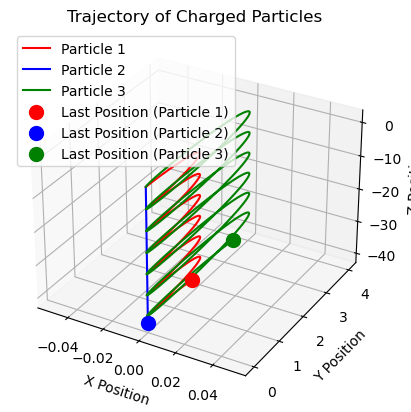

In [1065]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_positions, y1_positions, z1_positions, color = 'red', label='Particle 1')
ax.plot(x2_positions, y2_positions, z2_positions, color='blue', label='Particle 2')
ax.plot(temp1, temp2, temp3, color='green', label='Particle 3')



ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Trajectory of Charged Particle')



last_x1_position = x1_positions[-1]
last_y1_position = y1_positions[-1]
last_z1_position = z1_positions[-1]

last_x2_position = x2_positions[-1]
last_y2_position = y2_positions[-1]
last_z2_position = z2_positions[-1]

last_x3_position = temp1[-1]
last_y3_position = temp2[-1]
last_z3_position = temp3[-1]

ax.scatter(last_x1_position, last_y1_position, last_z1_position, c='red', marker='o', s=100, label='Last Position (Particle 1)')
ax.scatter(last_x2_position, last_y2_position, last_z2_position, c='blue', marker='o', s=100, label='Last Position (Particle 2)')
ax.scatter(last_x3_position, last_y3_position, last_z3_position, c='green', marker='o', s=100, label='Last Position (Particle 3)')



# last_x1_position = x1_positions[0]
# last_y1_position = y1_positions[0]
# last_z1_position = z1_positions[0]

# last_x2_position = x2_positions[0]
# last_y2_position = y2_positions[0]
# last_z2_position = z2_positions[0]


# ax.scatter(last_x1_position, last_y1_position, last_z1_position, c='red', marker='o', s=80, label='First Position (Particle 1)')
# ax.scatter(last_x2_position, last_y2_position, last_z2_position, c='blue', marker='o', s=50, label='First Position (Particle 2)')





ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Trajectory of Charged Particles')

# ax.view_init(elev=0, azim=0)
ax.legend()
plt.show()

In [1009]:
ln = len(x1_positions)
z_dif = []
for i in range (ln):
    temp = z1_positions[i] - z2_positions[i]
    z_dif.append(temp) 
hih = np.linspace(1,40,ln)
hih = hih
z_dif

[0.002,
 0.003999998,
 0.005999992000000001,
 0.007999980000002,
 0.009999960000012,
 0.011999930000042,
 0.013999888000112,
 0.015999832000252,
 0.017999760000504003,
 0.019999670000924,
 0.021999560001584,
 0.023999428002574,
 0.025999272004003995,
 0.02799909000600599,
 0.029998880008735983,
 0.03199864001237597,
 0.033998368017135946,
 0.03599806202325591,
 0.037997720031007855,
 0.03999734004069778,
 0.04199692005266767,
 0.04399645806729752,
 0.04599595208500732,
 0.04799540010625905,
 0.0499948001315587,
 0.05199415016145824,
 0.053993448196557645,
 0.0559926922375069,
 0.05799188028500794,
 0.059991010339816755,
 0.061990080402745285,
 0.06398908847466347,
 0.06598803255650126,
 0.06798691064925058,
 0.06998572075396733,
 0.07198446087177343,
 0.07398312900385878,
 0.07598172315148327,
 0.07798024131597875,
 0.07997868149875106,
 0.08197704170128207,
 0.08397531992513158,
 0.08597351417193938,
 0.08797162244342727,
 0.08996964274140098,
 0.09196757306775225,
 0.0939654114244607

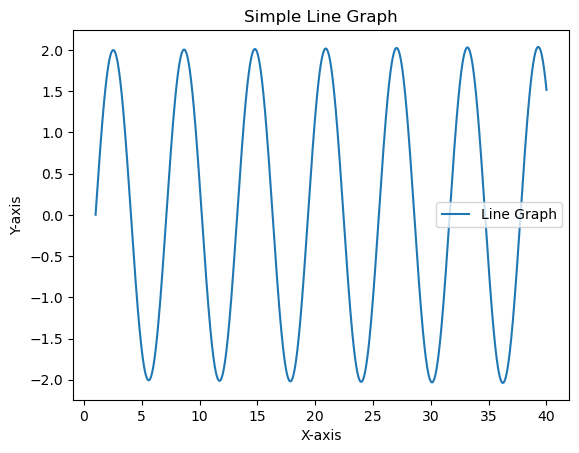

In [1010]:
plt.plot(hih, z_dif, label='Line Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Line Graph')
plt.legend()
plt.show()


The estimated frequency is: 0.0001591596371160274 Hz


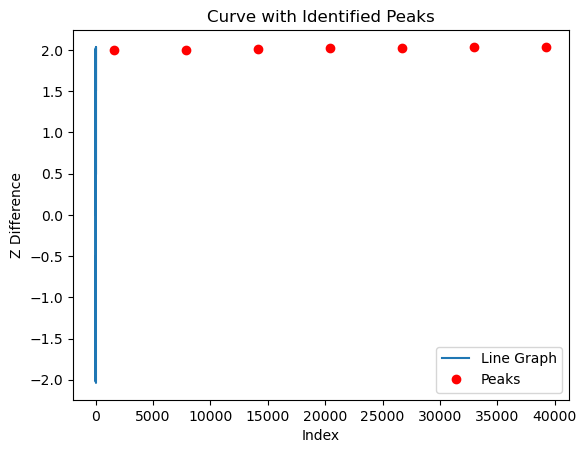

In [1011]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(z_dif)
if len(peaks) >= 2:
    distance_between_peaks = peaks[1] - peaks[0]
    frequency = 1 / distance_between_peaks
    print(f"The estimated frequency is: {frequency} Hz")


plt.plot(hih, z_dif, label='Line Graph')
plt.plot(peaks, np.array(z_dif)[peaks], 'ro', label='Peaks')  # Mark peaks with red dots
plt.xlabel('Index')
plt.ylabel('Z Difference')
plt.title('Curve with Identified Peaks')
plt.legend()
plt.show()
# 0.0001591596371160274 Hz at time = 40sec
# 0.0001591596371160274 Hz at time = 400sec
# it implies that frequency is same its amplitude is increasing that is it is of some form Ae^(at)cos(wt) increasing magnitude 

# N Particle

Fields

In [334]:
E = Vector(0.0, 1.0 ,0.0)
B = Vector(0.0 ,0.0 ,1.0)
# We can try the other method where we define electric and magnetic field as an list of Vectors storing the E,B at different time and positions
# like def Electic_field (x,y,z,t)

In [335]:
N = 2
N_Particles = []
N_acc = []
veloc = [Vector(0.0,0.0,0.0),Vector(0.0,0.0,0.0),Vector(0.0,0.0,0.0)]
posit = [Vector(10.0,0.0,0.0),Vector(0.0,10.0,0.0),Vector(0.0,0.0,10.0)]
for i in range(N):
    mass = 2e-4
    charge = 0
    mcharge = 1e-4
    pos = posit[i]
    vel = veloc[i]
    par_temp = Particle(mass,charge,mcharge,pos,vel)
    N_Particles.append(par_temp)

In [336]:
# for idx, par in enumerate(N_Particles):
#     print(f"Particle {idx + 1}:\n{par}\n")

In [337]:
for par in N_Particles:
    temp = tot_acc(par,E,B)
    N_acc.append(temp)

print(N_acc)

[Vector(0.0, 0.0, 0.0), Vector(0.0, 0.0, 0.0)]


In [338]:
total_time = 40
t = (int)(total_time/dt)
flag = 0
# ps = Vector(0.0,0.0,0.0)
for _ in range(t):
    temp_x = []
    temp_y = []
    temp_z = []
    for idx, par in enumerate(N_Particles):
        # N_acc[idx] = N_acc[idx] + Interaction_Force(par,N_Particles,idx)
        par.update(N_acc[idx])
        par.update_trajectory()
        N_acc[idx] = tot_acc(par,E,B) + Interaction_Force(par,N_Particles,idx)

    #Function to check if any of them are near to each other


Vector(0.011194514998803562, -0.011194514998803562, 0.0)
Vector(-0.011194514998803562, 0.011194514998803562, 0.0)
Vector(0.011194514973740126, -0.011194514973740126, 0.0)
Vector(-0.011194514948676692, 0.011194514948676692, 0.0)
Vector(0.011194514898549831, -0.011194514898549831, 0.0)
Vector(-0.011194514848422965, 0.011194514848422965, 0.0)
Vector(0.01119451477323267, -0.01119451477323267, 0.0)
Vector(-0.011194514698042371, 0.011194514698042371, 0.0)
Vector(0.01119451459778864, -0.01119451459778864, 0.0)
Vector(-0.011194514497534917, 0.011194514497534917, 0.0)
Vector(0.01119451437221776, -0.01119451437221776, 0.0)
Vector(-0.011194514246900605, 0.011194514246900607, 0.0)
Vector(0.01119451409652003, -0.011194514096520032, 0.0)
Vector(-0.011194513946139453, 0.011194513946139453, 0.0)
Vector(0.011194513770695455, -0.011194513770695455, 0.0)
Vector(-0.011194513595251459, 0.011194513595251459, 0.0)
Vector(0.011194513394744043, -0.011194513394744041, 0.0)
Vector(-0.011194513194236632, 0.011194

# Plotting Particles

/tmp/ipykernel_4180/114640553.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', len(N_Particles))
/tmp/ipykernel_4180/114640553.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(last_x_pos,last_y_pos,last_z_pos, c=color,marker = 'o',s = 100)


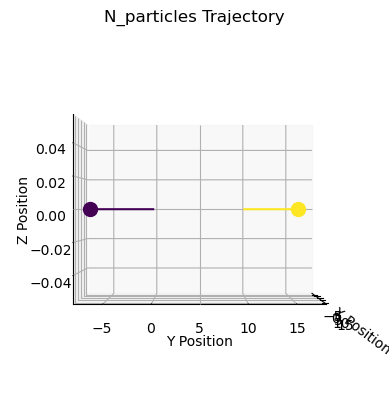

In [342]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colormap = cm.get_cmap('viridis', len(N_Particles))


for idx, par in enumerate(N_Particles):
    color = colormap(idx / len(N_Particles))
    ax.plot(par.trajectory_x ,par.trajectory_y ,par.trajectory_z, color = color, label=f'Particle {idx +1}')
    last_x_pos = par.trajectory_x[-1]
    last_y_pos = par.trajectory_y[-1]
    last_z_pos = par.trajectory_z[-1]
    ax.scatter(last_x_pos,last_y_pos,last_z_pos, c=color,marker = 'o',s = 100)

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('N_particles Trajectory')

ax.view_init(elev=0, azim=0)
ax.legend
plt.show()